## 파이썬기반 통계기초

In [1]:
import matplotlib.pyplot as plt

In [2]:
from collections import Counter

In [3]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

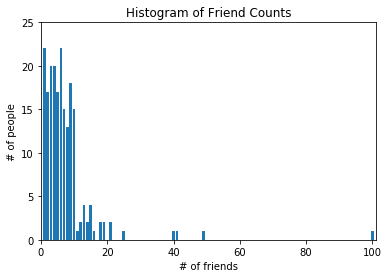

In [4]:
friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0,101,0,25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [5]:
#데이터포인트의 총갯수
num_points = len(num_friends)
num_points

204

In [6]:
#최댓값과 최소값
largest_value = max(num_friends)            # 100
smallest_value = min(num_friends)           # 1

In [7]:
largest_value

100

In [8]:
smallest_value

1

In [9]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]           # 1
second_smallest_value = sorted_values[1]    # 1
second_largest_value = sorted_values[-2]    # 49

- 중심경향성 (Central Tendency)

In [10]:
def mean(x): 
    return sum(x) / len(x)

In [11]:
mean(num_friends)

7.333333333333333

- 중앙값은? 데이터의 개수가 홀수라면 중앙값은 전체데이터에서 가장 중앙에 있는 데이터포인트
- 반면, 포인트의 개수가 짝수라면 중앙값은 전체데이터에서 가장 중앙에 있는 두 데이터 포인트의 평균
- 중앙값은 데이터 모든 값의 영향을 받지 않는다. 값이 가장 큰데이터포인트의 값을 더 크게 한다고 해도 중앙값은 안바뀜
- 데이터가 짝수인 경우까지 포함해야 하기 때문에 median함수는 살짝 복잡하다

In [12]:
def median(v):
    """v의 중앙값을 계산"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        # 홀수의 경우, 
        return sorted_v[midpoint]
    else:
        # 짝수면 두 중앙값의 평균을 반환
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

In [13]:
median(num_friends)

6.0

- 평균은 데이터가 바뀌여도 값의 변화가 더 부드럽다. 만약에 n개의 데이터포인트가 주어졌을때 데이터 포인트 한개의 값이 작은수 e만큼 증가한다면 평균은 e/n만큼 증가할 것이다. 
- 반면, 중앙값을 찾기 위해서는 주어진 데이터를 정렬해야 한다. 
- 하지만 평균은 이상치에 매우 민감하다. 가령 우리 데이터에 친구가 가장 많은 사용자가 200명의 친구를 가지고 있다면? 이런경우 평균은 7.82만큼 증가하겠지만 중앙값은 변하지 않을것이다. 
- 이상치가 나쁜데이터라면 평균은 데이터에 대해서 잘못된 정보를 줄 수 있음
- 1980년대 노스케롤라이나 대학교의 전공중에서 지리학과가 졸업생 초봉이 가장 높은 과로 조사되었다. 왜?

In [14]:
def quantile(x, p):
    """x의 p분위에 속하는 값을 반환"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

In [15]:
    print("quantile(num_friends, 0.10)", quantile(num_friends, 0.10))
    print("quantile(num_friends, 0.25)", quantile(num_friends, 0.25))
    print("quantile(num_friends, 0.75)", quantile(num_friends, 0.75))
    print("quantile(num_friends, 0.90)", quantile(num_friends, 0.90))

quantile(num_friends, 0.10) 1
quantile(num_friends, 0.25) 3
quantile(num_friends, 0.75) 9
quantile(num_friends, 0.90) 13


- 최빈값(데이터에서 가장 자주 나오는 값)

In [16]:
def mode(x):
    """최빈값이 하나보다 많다면 리스트를 반환"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [i for i, count in counts.items()
            if count == max_count]

In [17]:
mode(num_friends)

[6, 1]

- 산포도 : 데이터가 얼마나 퍼져있는지를 나타냄
- 보통 0과 근접한 값이면 데이터가 거의 퍼져 있지 않다는 의미이고, 큰 값이면 매우 퍼져 있는 것을 의미
- 가장 큰값과 작은 값의 차이를 나타냄
- 0인경우? x의 데이터 포인트는 모두 동일한 값을 갖고 있으며 퍼져있지 않다는 의미
- 데이터전체에 의존하지 않음. 

In [18]:
def data_range(x):
    return max(x) - min(x)

In [19]:
data_range(num_friends)

99

- 분산은 산포도를 측정하는 약간 더 복잡한 개념

In [20]:
def de_mean(x):
    """x의 모든 데이터 포인트에서 평균을 뺌 (평균을 0으로 만들기 위해서)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

In [21]:
def variance(x):
    """x에 2개이상의 데이터포인트가 있다고 가정"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1) #편차의 제곱의 평균을 계산
#n대신에 n-1로 나누어주는 이유는 뭘까? 이는 편차의 제곱합을 n으로 나누면 bias때문에 모분산에 대한 추정값이 실제 모분산보다 작게 계산되는것을 보정해주기 위함

In [22]:
def sum_of_squares(xs):
    return sum(x * x for x in xs)

In [23]:
variance(num_friends)

81.54351395730716

- 분산의 단위는 기존 단위의 제곱이다. (즉 친구수의 제곱)
- 그렇기 때문에, 분산 대신 원래 단위와 같은 단위를 가지는 표준편차를 이용할 때가 많다

In [24]:
import math

In [25]:
def standard_deviation(x):
    return math.sqrt(variance(x))

In [26]:
standard_deviation(num_friends)

9.03014473623248

- 범위와 표준편차 또한 평균처럼 이상치에 민감하게 반응하는 문제가 있다. 
- 만약 친구수가 가장 많은 사용자가 200명인 친구가 있다면 표준편차는 60%나 증가한 14.89가된다.
- 더 안정적인 방법은?
- 상위 25%에 해당하는 값과 하위 25%에 해당하는 값의 차이를 계산

In [27]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

In [28]:
interquartile_range(num_friends)

6

- 상관관계

- "사용자가 사이트에서 보내는 시간과 사용자의 친구수 사이에 연관성이 있다"는 가설을 검증하자
- 분산은 하나의 변수가 변수의 평균에서 얼마나 멀리 떨어져 있는지 계산한다면,
- 공분산은 두변수가 각각의 평균에서 얼마나 멀리 떨어져 있는지 계산한다

In [29]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]


In [30]:
import numpy as np

In [31]:
def covariance(x, y): #분산은 하나의 변수가 변수의 평균에서 얼마나 멀리 떨어져 있는지 계산 
    #공분산은 두변수가 각각의 평균에서 얼마나 멀리 떨어져 있는 살펴본다
    n = len(x)
    return np.dot(de_mean(x), de_mean(y)) / (n - 1)

In [32]:
covariance(num_friends, daily_minutes) #22.43

22.425435139573054

In [33]:
np.cov(num_friends,daily_minutes)

array([[ 81.54351396,  22.42543514],
       [ 22.42543514, 100.78589895]])

In [34]:
#공분산에서 각각의 표준편차를 나눠 준 상관관계
#상관관계는 단위가 없으며, 항상 -1 ~1사이의 값을 갖는다. 상관관계가 0.25라면?
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero
    
correlation(num_friends, daily_minutes)

0.24736957366478204

In [35]:
np.corrcoef(num_friends, daily_minutes)

array([[1.        , 0.24736957],
       [0.24736957, 1.        ]])

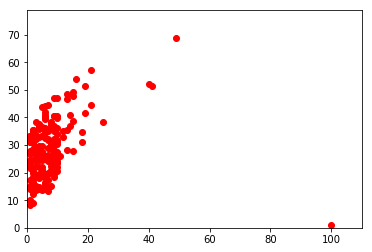

In [36]:
#100명의 친구가 있지만 하루에 1분만 사이트를 이용하는 사용자는 확실히 이상치이며 상관관계에 큰 영향을 줌!
plt.plot(num_friends, daily_minutes, 'ro')
plt.axis([0,max(num_friends)+10,0,max(daily_minutes) +10 ])
plt.show()

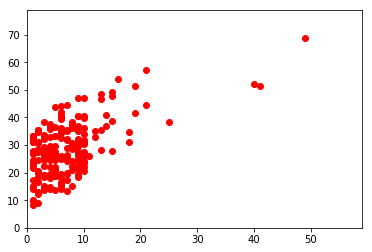

In [37]:
outlier = num_friends.index(100) # index of outlier

num_friends_good = [x 
                    for i, x in enumerate(num_friends) 
                    if i != outlier]

daily_minutes_good = [x 
                      for i, x in enumerate(daily_minutes) 
                      if i != outlier]

plt.plot(num_friends_good, daily_minutes_good, 'ro')
plt.axis([0,max(num_friends_good)+10,0,max(daily_minutes_good) +10 ])
plt.show()
#이상치 데이터는 알고보니 회사에서 테스트용으로 생성했다가 제거하는 것을 잊은 테스트용 계정이였음. 

- 상관관계와 인과관계?
- Correlation is not causation!
- X->Y Y->X, 다른외부요인이 발생시키거나?
- 어쩌면 데이터과학에 더 열정적인 사용자일수록 더 많은 시간을 사이트에 할애하고, 데이터과학분야에 속한 친구들을 더 많이 만드는것일수도 있음. 
- 인과관계를 확인해보는 방법? 데이터 포인트를 무작위로 선택해서 확인해보는 방법. 비슷한 조건과 성질의 두 그룹으로 나누로 한 그룹에만 다른요인을 적용해본다면 해당 요인과 결과의 인과관계를 확인할 수 있음. 